# Importing required libraries
### coverting Dataset to dataframe

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('weatherHistory.csv')

In [10]:
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [11]:
df.describe()

,Apparent Temperature (C),Humidity
count,96453.000000,96453.000000
mean,10.855029,0.734899
std,10.696847,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


### Removing unneccesory Columns

In [13]:
df = df.drop(['Daily Summary','Wind Bearing (degrees)','Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'], axis = 1)

KeyError: "['Daily Summary' 'Wind Bearing (degrees)' 'Summary' 'Precip Type'\n 'Temperature (C)' 'Wind Speed (km/h)' 'Visibility (km)'\n 'Pressure (millibars)'] not found in axis"

In [120]:
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


### checking for Nan values and fill if there

In [121]:
df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

### Changing 'Formatted Date' to month

In [14]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

In [15]:
df = df.set_index('Formatted Date')
data = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()

In [16]:
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


### Plotting

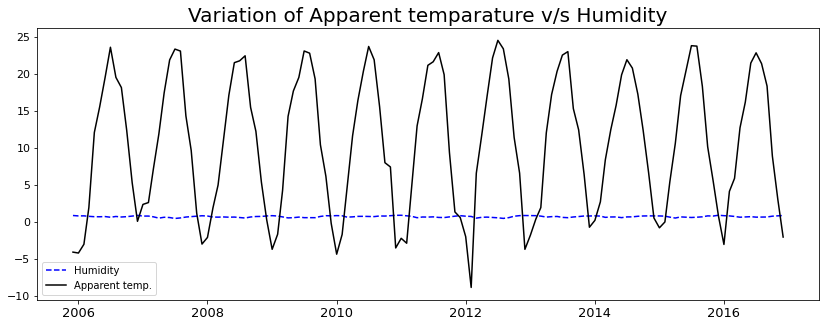

In [29]:
plt.figure(figsize=(14,5));
plt.plot(data['Humidity'], label = 'Humidity', color = 'blue',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'black');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 20);
plt.legend(loc = 0, fontsize = 10);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 11);

In [127]:
april = data[data.index.month==4]

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

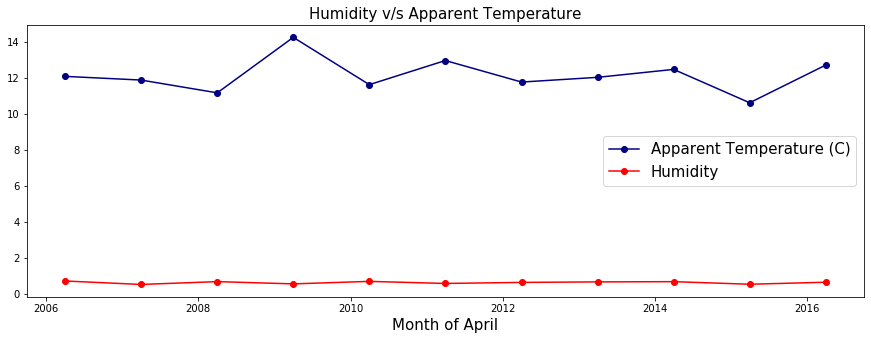

In [128]:
plt.figure(figsize=(15,5))
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'navy');
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'red');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### Groupby

In [129]:
df.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


In [133]:
df = df.reset_index()
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc = True)
df['month'] = df['Formatted Date'].dt.month
df['year'] = df['Formatted Date'].dt.year

In [134]:
df.head()

,index,Formatted Date,Apparent Temperature (C),Humidity,month,year
0,0,2006-03-31 22:00:00+00:00,7.388889,0.89,3,2006
1,1,2006-03-31 23:00:00+00:00,7.227778,0.86,3,2006
2,2,2006-04-01 00:00:00+00:00,9.377778,0.89,4,2006
3,3,2006-04-01 01:00:00+00:00,5.944444,0.83,4,2006
4,4,2006-04-01 02:00:00+00:00,6.977778,0.83,4,2006


In [136]:
data3 = df.groupby(['month','year']).mean()

In [144]:
data3 = data3.drop(['index'],axis = 1)
data3.head()


Apparent Temperature (C)  Humidity
month year                                    
1     2006                 -4.173708  0.834610
      2007                  2.387015  0.813495
      2008                 -2.069907  0.819476
      2009                 -3.669937  0.867621
      2010                 -4.329062  0.875914

In [145]:
data3

Apparent Temperature (C)  Humidity
month year                                    
1     2006                 -4.173708  0.834610
      2007                  2.387015  0.813495
      2008                 -2.069907  0.819476
      2009                 -3.669937  0.867621
      2010                 -4.329062  0.875914
...                              ...       ...
12    2012                 -3.672909  0.886801
      2013                 -0.690054  0.823965
      2014                  0.556586  0.835927
      2015                  0.828644  0.925390
      2016                 -2.017272  0.887981

[133 rows x 2 columns]

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 10 Text yticklabel objects>)

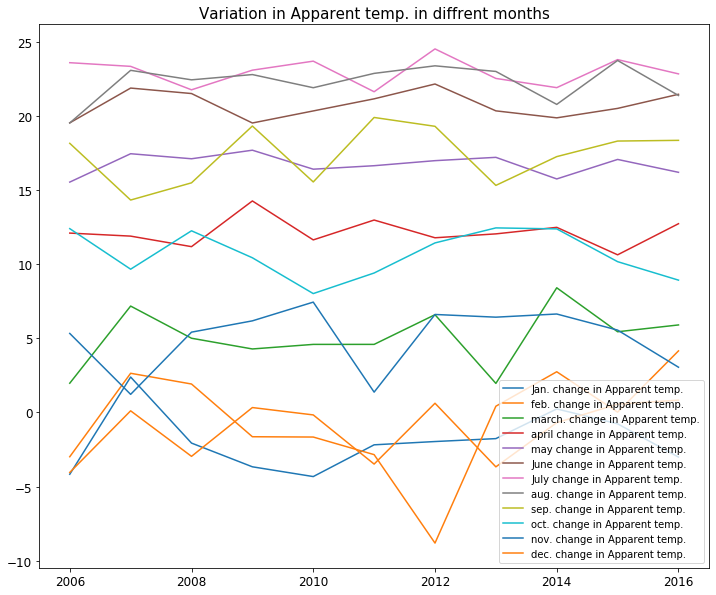

In [187]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Apparent Temperature (C)'][:11].values, label = 'Jan. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][11:22].values, label = 'feb. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][22:33].values, label = 'march. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][33:44].values, label = 'april change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][44:55].values, label = 'may change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][55:66].values, label = 'June change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][66:77].values, label = 'July change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][77:88].values, label = 'aug. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][88:99].values, label = 'sep. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][99:110].values, label = 'oct. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][110:121].values, label = 'nov. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][121:132].values, label = 'dec. change in Apparent temp.')
#plt.xlabel(np.arange(2006,2017), fontsize = 15)
plt.legend(loc = 0)
plt.title('Variation in Apparent temp. in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)





(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 7 Text yticklabel objects>)

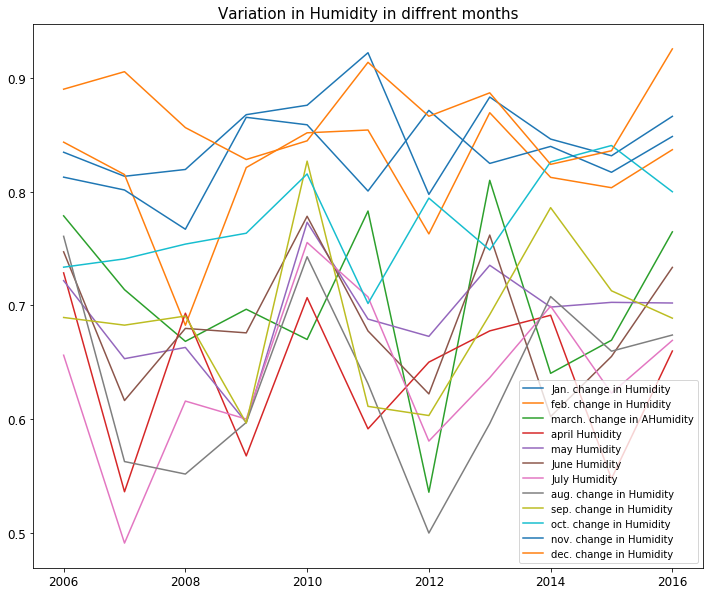

In [188]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][:11].values, label = 'Jan. change in Humidity')
plt.plot(a,data3['Humidity'][11:22].values, label = 'feb. change in Humidity')
plt.plot(a,data3['Humidity'][22:33].values, label = 'march. change in Humidity')
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Humidity')
plt.plot(a,data3['Humidity'][44:55].values, label = 'may Humidity')
plt.plot(a,data3['Humidity'][55:66].values, label = 'June Humidity')
plt.plot(a,data3['Humidity'][66:77].values, label = 'July Humidity')
plt.plot(a,data3['Humidity'][77:88].values, label = 'aug. change in Humidity')
plt.plot(a,data3['Humidity'][88:99].values, label = 'sep. change in Humidity')
plt.plot(a,data3['Humidity'][99:110].values, label = 'oct. change in Humidity')
plt.plot(a,data3['Humidity'][110:121].values, label = 'nov. change in Humidity')
plt.plot(a,data3['Humidity'][121:132].values, label = 'dec. change in Humidity')
plt.legend(loc = 0)
plt.title('Variation in Humidity in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

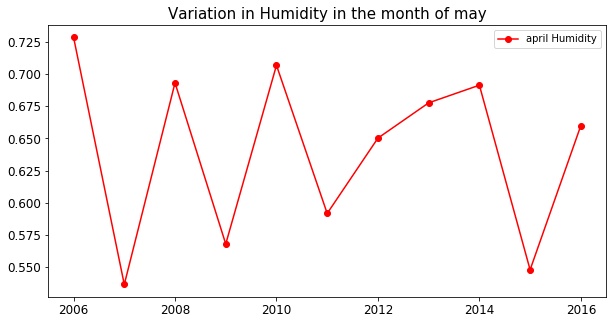

In [196]:
plt.figure(figsize = (10,5))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Humidity',marker = 'o',color = 'red')
plt.title('Variation in Humidity in the month of may',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 0)

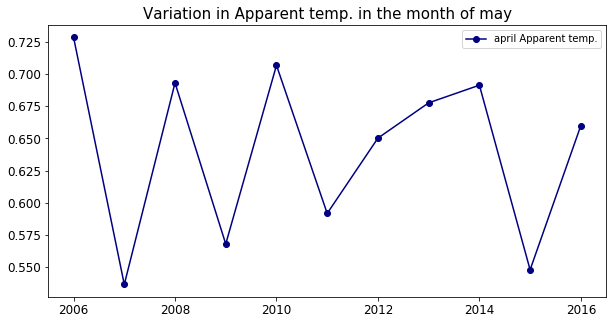

In [195]:
plt.figure(figsize = (10,5))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Apparent temp.',color = 'navy', marker = 'o')
plt.title('Variation in Apparent temp. in the month of may',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 0)